
# A One Asset HANK Model 

This notebook solves a New Keynesian model in which there is only a single liquid asset.  This is the second model described in <cite data-cite="6202365/ECL3ZAR7"></cite>.  For a detailed description of their solution method, see the companion two-asset HANK model notebook.

In [1]:
# Setup
from __future__ import print_function

# This is a jupytext paired notebook that autogenerates a corresponding .py file
# which can be executed from a terminal command line via "ipython [name].py"
# But a terminal does not permit inline figures, so we need to test jupyter vs terminal
# Google "how can I check if code is executed in the ipython notebook"

def in_ipynb():
    try:
        if str(type(get_ipython())) == "<class 'ipykernel.zmqshell.ZMQInteractiveShell'>":
            return True
        else:
            return False
    except NameError:
        return False

# Determine whether to make the figures inline (for spyder or jupyter)
# vs whatever is the automatic setting that will apply if run from the terminal
if in_ipynb():
    # %matplotlib inline generates a syntax error when run from the shell
    # so do this instead
    get_ipython().run_line_magic('matplotlib', 'inline') 
else:
    get_ipython().run_line_magic('matplotlib', 'auto') 
    
# The tools for navigating the filesystem
import sys
import os

# Find pathname to this file:
my_file_path = os.path.dirname(os.path.abspath("OneAsset-HANK.ipynb"))

# Relative directory for pickled code
code_dir = os.path.join(my_file_path, "../Assets/One/") 

sys.path.insert(0, code_dir)
sys.path.insert(0, my_file_path)

In [2]:
# Ignore system warnings while running the notebook
import warnings
warnings.filterwarnings('ignore')

# Load Stationary equilibrium (StE) object EX2SS

import pickle
os.chdir(code_dir) # Go to the directory with pickled code

## EX2SS.p is the information in the stationary equilibrium (20: the number of illiquid and liquid weath grids )
EX2SS=pickle.load(open("EX2SS.p", "rb"))

In [3]:
from HARK.BayerLuetticke.Assets.One.FluctuationsOneAssetIOUsBond import FluctuationsOneAssetIOUs, SGU_solver, plot_IRF

Elapsed time is  0.05101699999999987  seconds.
Use Schmitt Grohe Uribe Algorithm
 A *E[xprime uprime] =B*[x u]
 A = (dF/dxprimek dF/duprime), B =-(dF/dx dF/du)
Computing Jacobian F1=DF/DXprime F3 =DF/DX
Total number of parallel blocks:  3 .
Block number:  0  done.
Block number:  1  done.
Block number:  2  done.
Elapsed time is  25.685692000000003  seconds.
Computing Jacobian F2 - DF/DYprime
Total number of parallel blocks:  3 .
Block number:  0  done.
Block number:  1  done.
Block number:  2  done.
Elapsed time is  0.9454619999999991  seconds.


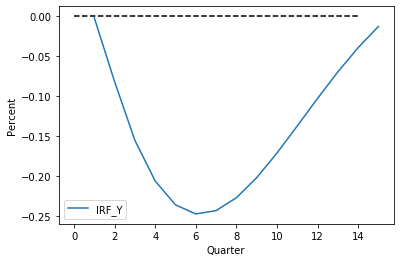

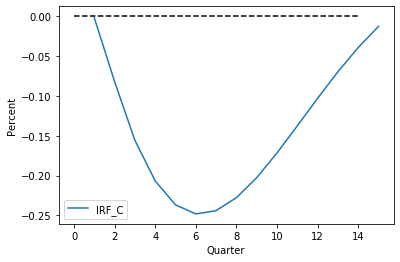

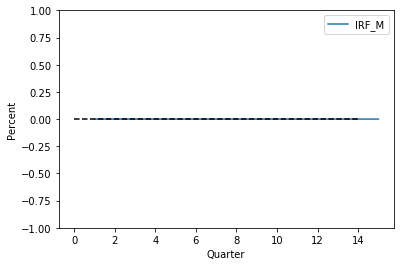

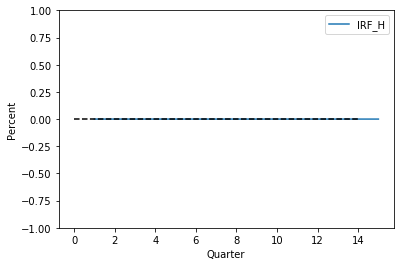

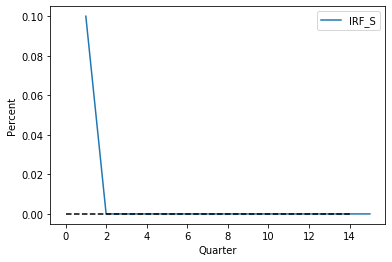

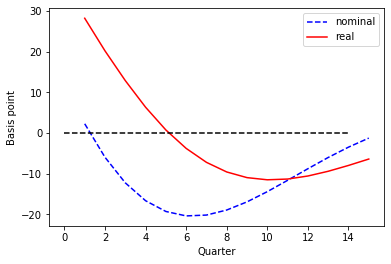

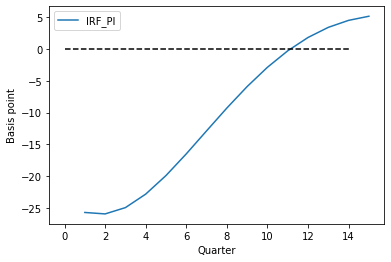

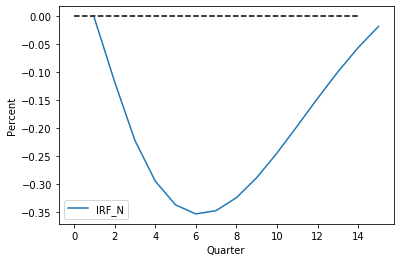

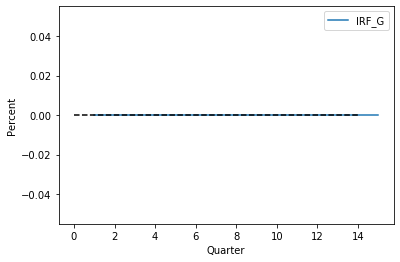

In [4]:
# Uncertainty Shock
    
EX2SS['par']['aggrshock'] = 'Uncertainty'
EX2SS['par']['rhoS'] = 0.84    # Persistence of variance
EX2SS['par']['sigmaS'] = 0.54    # STD of variance shocks

EX2SR=FluctuationsOneAssetIOUs(**EX2SS)
SR=EX2SR.StateReduc()

SGUresult=SGU_solver(SR['Xss'],SR['Yss'],SR['Gamma_state'],SR['Gamma_control'],SR['InvGamma'],SR['Copula'],
                         SR['par'],SR['mpar'],SR['grid'],SR['targets'],SR['P_H'],SR['aggrshock'],SR['oc'])

plot_IRF(SR['mpar'],SR['par'],SGUresult['gx'],SGUresult['hx'],SR['joint_distr'],
             SR['Gamma_state'],SR['grid'],SR['targets'],SR['os'],SR['oc'],SR['Output'])

Elapsed time is  0.04381399999999758  seconds.
Use Schmitt Grohe Uribe Algorithm
 A *E[xprime uprime] =B*[x u]
 A = (dF/dxprimek dF/duprime), B =-(dF/dx dF/du)
Computing Jacobian F1=DF/DXprime F3 =DF/DX
Total number of parallel blocks:  3 .
Block number:  0  done.
Block number:  1  done.
Block number:  2  done.
Elapsed time is  26.346356  seconds.
Computing Jacobian F2 - DF/DYprime
Total number of parallel blocks:  3 .
Block number:  0  done.
Block number:  1  done.
Block number:  2  done.
Elapsed time is  0.9628140000000016  seconds.


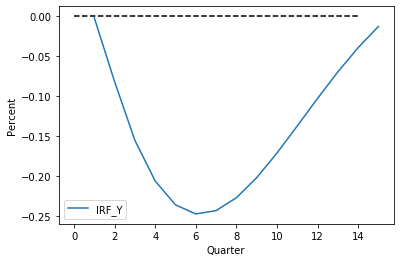

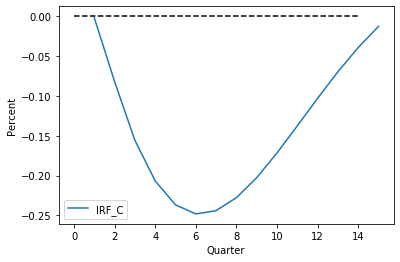

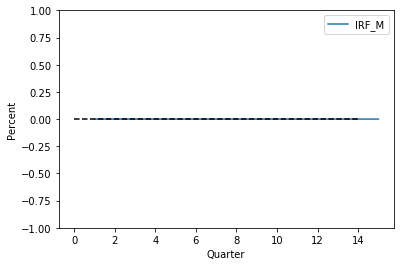

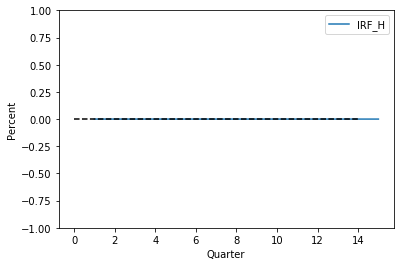

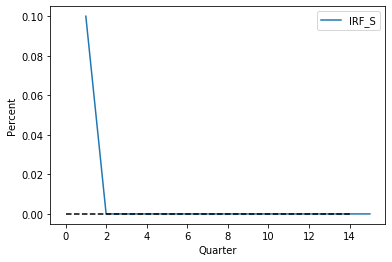

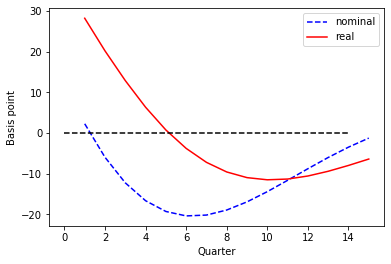

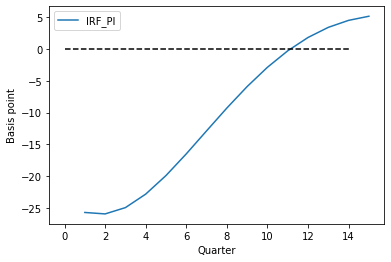

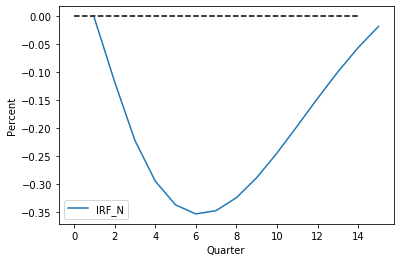

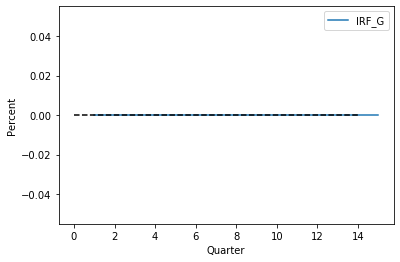

In [5]:
# Monetary Policy Shock

EX2SS['par']['aggrshock'] = 'MP'
EX2SS['par']['rhoS'] = 0.0      # Persistence of variance
EX2SS['par']['sigmaS'] = 0.001    # STD of variance shocks

EX2SR=FluctuationsOneAssetIOUs(**EX2SS)
SR=EX2SR.StateReduc()

SGUresult=SGU_solver(SR['Xss'],SR['Yss'],SR['Gamma_state'],SR['Gamma_control'],SR['InvGamma'],SR['Copula'],
                         SR['par'],SR['mpar'],SR['grid'],SR['targets'],SR['P_H'],SR['aggrshock'],SR['oc'])

plot_IRF(SR['mpar'],SR['par'],SGUresult['gx'],SGUresult['hx'],SR['joint_distr'],
             SR['Gamma_state'],SR['grid'],SR['targets'],SR['os'],SR['oc'],SR['Output'])

Elapsed time is  0.04532199999999875  seconds.
Use Schmitt Grohe Uribe Algorithm
 A *E[xprime uprime] =B*[x u]
 A = (dF/dxprimek dF/duprime), B =-(dF/dx dF/du)
Computing Jacobian F1=DF/DXprime F3 =DF/DX
Total number of parallel blocks:  3 .
Block number:  0  done.
Block number:  1  done.
Block number:  2  done.
Elapsed time is  24.163849  seconds.
Computing Jacobian F2 - DF/DYprime
Total number of parallel blocks:  3 .
Block number:  0  done.
Block number:  1  done.
Block number:  2  done.
Elapsed time is  0.8783719999999988  seconds.


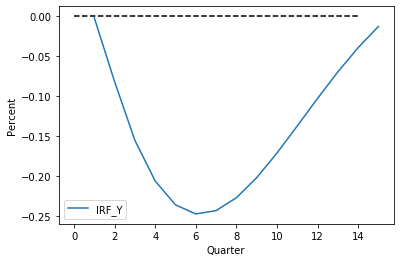

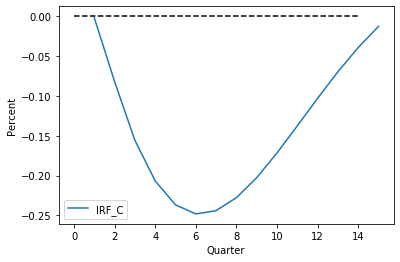

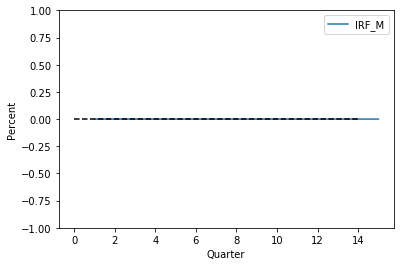

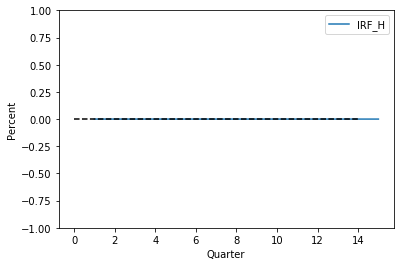

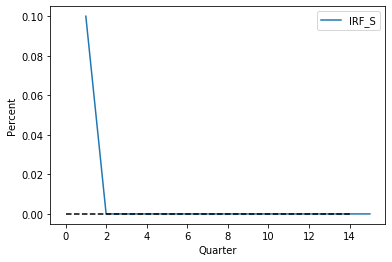

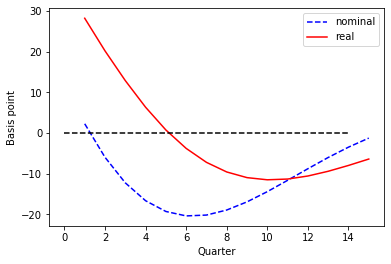

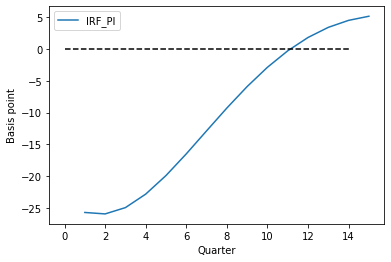

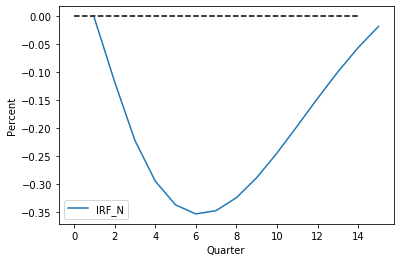

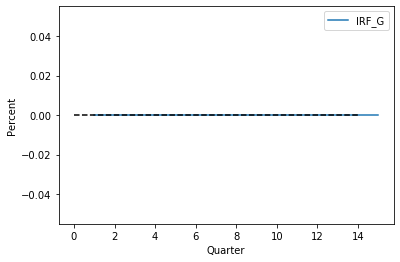

In [6]:
# Productivity Shock

EX2SS['par']['aggrshock'] = 'TFP'
EX2SS['par']['rhoS'] = 0.95
EX2SS['par']['sigmaS'] = 0.0075

EX2SR=FluctuationsOneAssetIOUs(**EX2SS)
SR=EX2SR.StateReduc()

SGUresult = SGU_solver(SR['Xss'],SR['Yss'],SR['Gamma_state'],SR['Gamma_control'],SR['InvGamma'],SR['Copula'],
                         SR['par'],SR['mpar'],SR['grid'],SR['targets'],SR['P_H'],SR['aggrshock'],SR['oc'])

plot_IRF(SR['mpar'],SR['par'],SGUresult['gx'],SGUresult['hx'],SR['joint_distr'],
             SR['Gamma_state'],SR['grid'],SR['targets'],SR['os'],SR['oc'],SR['Output'])